# Analysing Algorithms

In [1]:
#Problem statement: Compute the sum of first n natural numbers

#Solution-1 

def sum1(n):
    output = 0
    for i in range(n+1):
        output = output + i
    return output
print(sum1(5))


15


In [2]:
#Solution-2

def sum2(n):
    return (n*(n+1))/2
print(sum2(5))

15.0


In [3]:
# Objectively compare both the functions based on time and memory -- using %timeit

%timeit sum1(1000) #Order of micro seconds

%timeit sum2(1000) #Order of nano seconds

60.7 µs ± 2.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
213 ns ± 13.1 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


But here the time can be hardware dependent, So we need a hardware independent way to objectively analyse the algorithms.
Big-O notation comes handy in this case. Big-O specifies how quickly the run time increases with the increase in input size
Big-O talks about 
-> the scalability aspect
-> only concerned about how the run time grows relative to the input
-> determine which part of the code actually drives the run-time behaviour

Big-O == Asymptotic analysis == Describing Limiting behaviour == Worst case scenario

Big-O analyses the limiting factor in an algorithm or has the highest effect on the answer or the real bottleneck

sum1 == O(n+1) == Linear

Factors influencing the run time:

1.Assignment Operations (Reason to avoid for loops in ML/AI tasks)

Example: numpy arrays are more faster than python builtin lists sequence or dataframes instead


In [4]:
#Checking if the constant values hold any significance in Big-O notation
def bigO(n):
    return 23*(n**3)+ 34*(n**2)+4*n+24
print(bigO(1))
print(bigO(10))
print(bigO(40))


85
26464
1526584


It is observed that the constant value 24 or the other parameters doesn't hold any significance or don't contribute to computational time, but it's the factor/order of 'n' O(n**3) that actually determines the final output.

![alt text](bigocomplexity.jpeg "Title")

![alt text](bigonames.png "Title")

![alt text](bigoruntime.png "Title")

Demonstrating why to avoid exponential, quadratic and cubic!

Text(0, 0.5, 'Runtime')

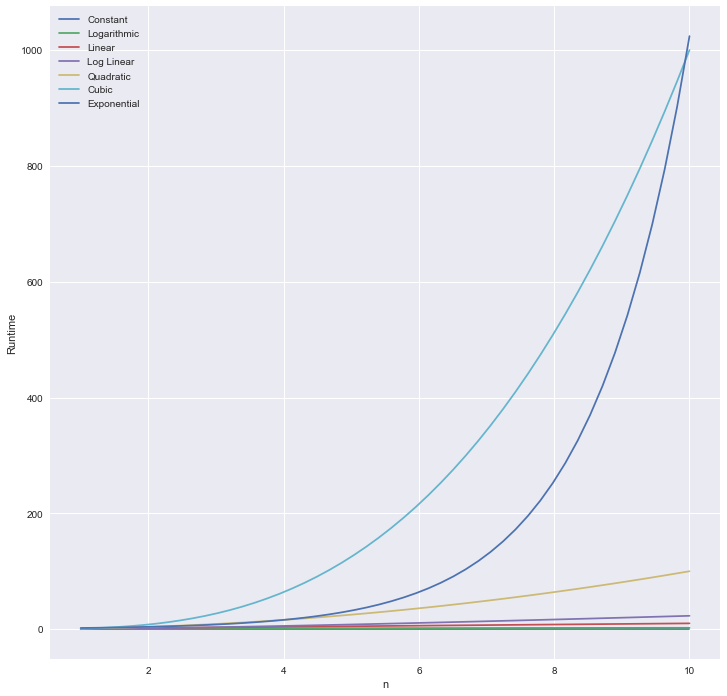

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#runtime comparisons
n = np.linspace(1,10)
labels = ['Constant','Logarithmic','Linear','Log Linear','Quadratic','Cubic','Exponential']
bigo = [np.ones(n.shape), np.log(n), n , n*np.log(n), n**2, n**3, 2**n]

plt.figure(figsize=(12,12))
plt.style.use('seaborn')
for i in range(len(bigo)):
    plt.plot(n,bigo[i],label = labels[i])
plt.legend()
plt.xlabel('n')
plt.ylabel('Runtime')

### Example-1 : O(1) - Constant 

In [6]:
#Return the first element of the list
def bigo_constant(values):
    return values[0]
%timeit bigo_constant([1,2,3])
print(bigo_constant([1,2,3]))

%timeit bigo_constant([1,2,3,4,5,6,7,8,9,10])
print(bigo_constant([1,2,3,4,5,6,7,8,9,10]))

189 ns ± 34.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1
240 ns ± 32.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1


### Example-2 : O(n) - Linear

In [7]:
#print every element of the list
def bigo_linear(values):
    for i in values:
        print(i, end = " ")
        
bigo_linear([1,2,3])


1 2 3 

In [8]:
bigo_linear([1,2,3,4,5,6,7,8,9,10])

1 2 3 4 5 6 7 8 9 10 

### Example-3 : O(n**2) - Quadratic

In [9]:
#Get the pairs for a list
def bigo_quadratic(values):
    for i in values:
        for j in values:
            print(i,j)
        
bigo_quadratic([1,2,3])

1 1
1 2
1 3
2 1
2 2
2 3
3 1
3 2
3 3


### Comparing between O(n) and 3*O(n)

In [10]:
#There will not be much run time difference between the two as n gets large
def print_1(val):
    for i in val:
        print(i, end = " ")
    print("\n")

def print_3(val):
    for i in val:
        print(i, end = " ")
    print("\n")
    for i in val:
        print(i, end = " ")
    print("\n")
    for i in val:
        print(i, end = " ")
        
print_1([1,2,3])
print_3([4,5,6])

1 2 3 

4 5 6 

4 5 6 

4 5 6 

### Comparing O(1+ n/2+20)

In [11]:
def comp(val):
    #O(1)
    print(val[0])
    #O(n/2)
    mid = len(val)//2
    for i in val[:mid]:
        print(i, end = " ")
    print("\n")
    #O(20)
    for i in range(20):
        print(i, end = " ")
        
comp([1,2,3,4,5,7])

1
1 2 3 

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

As n gets large, 1 and 20 hold not much value and even divide by 2 doesn't hold significance after a point and finally end up with O(n)

### Best case and Worst case scenarios

Most of the times we consider big-O notation for worst case
scenario, but we need to prove that the best and worst case scenarios have completely
different big-O times

In [12]:
#Example
def find_ele(val, ele):
    for i in val:
        if i == ele:
            return True
    return False

find_ele([1,2,3,4,5,],1) #Best Case -- Constant


True

In [13]:
find_ele([1,2,3,4,5,],6) #Worst Case -- Linear

False

# Space Complexity

Just like time, memory allocation is another factor determining the
efficiency of an algorithm, we can check the size of memory allocation 

In [14]:
#Example
def space_complexity(n):
    for i in range(n): # Affects time complexity
        print("Helloworld" ,end = " ") # Affects space complexity
space_complexity(10)

Helloworld Helloworld Helloworld Helloworld Helloworld Helloworld Helloworld Helloworld Helloworld Helloworld 

Here, the time complexity might be O(n), but the space complexity is just O(1) as the string "Helloworld" is constant and is just stored once

# Array Sequences

There are 3 types of array sequences in python:<br>
1.List <br>
2.Tuple<br>
3.String

-> 8 bits = 1 byte <br>
-> Memory address is assigned to each byte <br>
-> Indexing is enabled in all array sequences making it O(1) time complexity <br>
-> Each character in python is UNICODE which is 2 bytes

# Referencing portion of array/lists 

Step 1: Create a list with first 10 numbers<br>
Step 2: Create a temporary list that refers to a portion of the first list => original_list[2:5] <br>
Step 3: Changing an element in the temporary list doesn't affect the first list<br>
Introducing the concept of pointers

In [15]:
orig_list = [1,2,3,4,5,6,7,8,9,10]
temp_list = orig_list[2:5]
temp_list[2] = 14
print("orig_list = ",orig_list)
print("temp_list = ",temp_list)

orig_list =  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
temp_list =  [3, 4, 14]


![alt text](pythonarray.png "Title")

### Key Takeaways - 1:

1. New lists built based on original lists create a shallow copy of the list but does not duplicate it
2. Lists only refer to the values,but do not contain values itself
3. We mostly manipulate references and calls but not the objects
4. If we assign a list to another, both the lists point to the same object and thus, changes in one are reflected in another

In [16]:
l1 = [1,2,3,4]
l2 = l1
l2[0] = 100
l1

[100, 2, 3, 4]

In [17]:
#Check the size of lists
import sys
n = 20
data = []
for i in range(n):
    a = len(data)
    b = sys.getsizeof(data)
    print('Length : %d, Size in bytes : %3d'%(a,b))
    data.append(n)


Length : 0, Size in bytes :  56
Length : 1, Size in bytes :  88
Length : 2, Size in bytes :  88
Length : 3, Size in bytes :  88
Length : 4, Size in bytes :  88
Length : 5, Size in bytes : 120
Length : 6, Size in bytes : 120
Length : 7, Size in bytes : 120
Length : 8, Size in bytes : 120
Length : 9, Size in bytes : 184
Length : 10, Size in bytes : 184
Length : 11, Size in bytes : 184
Length : 12, Size in bytes : 184
Length : 13, Size in bytes : 184
Length : 14, Size in bytes : 184
Length : 15, Size in bytes : 184
Length : 16, Size in bytes : 184
Length : 17, Size in bytes : 256
Length : 18, Size in bytes : 256
Length : 19, Size in bytes : 256


![alt text](dynamicarraysize.png "Title")

### Key Takeaways - 2:

1. Python assigns a certain minimum size when a list/array is declared (56 in this case) <br>
2. Since we don't declare the size of arrays in python, python internally handles the list size <br>
3. Based on the input, python generally doubles the list size everytime an extra element is inserted after the current one fully occupied<br>
4. Python internally copies the old list to a new list which is generall double the size and the old list is set to garbage<br>


# Dynamic Arrays

### Given 2 arrays, check if they are anagrams (contain same letters)
Note: Ignore capitals and spaces

In [18]:
#Method-1
#Using python built-in functions
def anagrams(s1,s2):
    s1 = s1.replace(" ",'').lower()
    s2 = s2.replace(" ",'').lower()
    if sorted(s1) == sorted(s2):
        return True
    else:
        return False

In [19]:
anagrams("public relations","crap built on lies")

True

In [20]:
anagrams("clint eastwood","old west action")

True

In [21]:
#Method-2
#Using counts and dictionaries 
'''
Pseudo code:
Step 1: Check if the lengths of both strings are equal
Step 2: Check if the frequency count of each letter in strings are equal
'''
def anagram2(s1,s2):
    s1 = s1.replace(" ","").lower()
    s2 = s2.replace(" ","").lower()
    
    #Check if lengths are equal
    if len(s1)!=len(s2):
        return False
    
    #Count the frequency of letters in the the strings
    letter_freq = {}
    
    #Add the frequencies of letters from string-1
    for letter in s1:
        if letter in letter_freq: #If letter already in the dictionary
            letter_freq[letter] += 1
        else:                     # New letter
            letter_freq[letter] = 1
            
    #Subtract the frequencies of letters from string-2      
    for letter in s2:
        if letter in letter_freq: #If letter already in the dictionary
            letter_freq[letter] -= 1
        else:
            letter_freq[letter] = 1
    
    for i in letter_freq:
        if letter_freq[i] != 0:
            return False
    
    return True
            

In [22]:
anagram2("public relations","crap built on lies")

True

In [23]:
anagram2("clint eastwood","old west action")

True

In [24]:
#Method-3
#Comparing 2 dictionaries
def anagram3(s1,s2):
    s1 = s1.replace(" ","").lower()
    s2 = s2.replace(" ","").lower()
    
    #Check if lengths are equal
    if len(s1)!=len(s2):
        return False
    
    #Count the frequency of letters in the the strings
    s1_letter_freq = {}
    s2_letter_freq = {}
    
    #Add the frequencies of letters from string-1
    for letter in s1:
        if letter in s1_letter_freq: #If letter already in the dictionary
            s1_letter_freq[letter] += 1
        else:                     # New letter
            s1_letter_freq[letter] = 1
            
    #Add the frequencies of letters from string-2
    for letter in s2:
        if letter in s2_letter_freq: #If letter already in the dictionary
            s2_letter_freq[letter] += 1
        else:                     # New letter
            s2_letter_freq[letter] = 1
            
    if s1_letter_freq  == s2_letter_freq:
        return True
    else:
        return False
            

In [25]:
anagram3("public relations","crap built on lies")

True

In [26]:
anagram3("clint eastwood","old WEST action")

True

In [27]:
%timeit anagrams("public relations","crap built on lies")

2.78 µs ± 304 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [28]:
%timeit anagram2("public relations","crap built on lies")

8.3 µs ± 1.13 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [29]:
%timeit anagram3("public relations","crap built on lies")

4.75 µs ± 225 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


From the comparison of 3 algorithms, the time taken using <br>
python built-in libraries < comparing dictionaries < multiple assignment ops

### Given an integer array, output all unique pairs that sum up to specific value k

In [35]:
def pair_sum(l,s):
    if len(l) < 2:
        return print('Too small')
    
    seen = set()
    output = set()
    
    for i in l:
        target = s-i
        
        if target not in seen:
            seen.add(i)
        else:
            output.add((min(i,target),max(i,target)))
    
    print("\n".join(map(str,list(output))))
    


In [34]:
def pair_sum1(l,s):
    if len(l) < 2:
        return print('Too small')
    
    output = set()
    
    for i in range(len(l)):
        temp = l
        curr = temp[0]
        temp.remove(curr)
        for j in temp:
            if curr+j == s:
                output.add((min(curr,j),max(curr,j)))          
    print("\n".join(map(str,list(output))))
    
           

In [32]:
pair_sum([1,2,3,2],4) 

(1, 3)
(2, 2)


In [33]:
pair_sum1([1,2,3,2],4) 

(1, 3)
(2, 2)


### Find Largest continuous sum of an array

In [38]:
def largest_sum(l):
    if len(l)==0:
        return print("Array of 0 length")
    max_sum = l[0] #Initializing with first element
    curr_sum = l[0] #Initializing with first element
    for num in l[1:]:
        curr_sum = max(curr_sum+num, num)
        max_sum = max(max_sum,curr_sum)
    print(max_sum)
        
largest_sum([7,1,2,-1,3,4,10,-12,3,21,-19])       
        

38


### Given a string of words, reverse the words in the string

In [43]:
#Method-1 : Built-in method
def reverse_string(s):
    return " ".join(reversed(s.split()))

def reverse_string1(s):
    return " ".join(s.split()[::-1]) #[beginning:end:in_reverse]



In [44]:
reverse_string("hello world I am here")

'here am I world hello'

In [45]:
reverse_string1("hello world I am here")

'here am I world hello'

In [15]:
#Without built-in functions
def reverse_string2(s):
    l = []
    temp = ""
    for i in s:
        if i == ' ':
            l.append(temp)
            temp = ''
        else:
            temp = temp+i
    if temp: #For last word
        l.append(temp)
    print(" ".join(l[::-1]))


In [16]:
reverse_string2("hello world I am here")  

here am I world hello


### Given 2 arrays, check if one array is rotation of other

In [1]:
'''
Pseudo-code:
Pick an index in one list and get the value and check for the value in another list
and once found, compare index-index values and return True if the values match
'''
def rotation(list1, list2):
    if len(list1) != len(list2):
        return False
    key = list1[0]
    key_index_in_list2 = -1
    
    for i in range(len(list2)):
        if list2[i] == key:
            key_index_in_list2 = i
            break
    
    if key_index_in_list2 == -1:
        return False
    
    c = 0
    
    for i in range(len(list1)):
        list2_index = (key_index_in_list2 + i) % len(list1) 
        if list1[i] == list2[list2_index]:
            c = c+1
            
    if c == len(list1):
        return True
    else:
        return False
    
        


In [2]:
print(rotation([1,2,3,4,5,6,7],[3,4,5,6,7,1,2]))

True


In [4]:
print(rotation([1,2,3,4,5,6,7],[3,4,5,6,7,1,4]))

False


### Common elements in 2 sorted arrays

In [2]:
def common_elements(list1, list2):
    l1_index = 0
    l2_index = 0
    common_list = []
    
    while l1_index < len(list1) and l2_index < len(list2):
        if list1[l1_index] == list2[l2_index]:
            common_list.append(list1[l1_index])
            l1_index += 1
            l2_index += 1
        elif list1[l1_index] > list2[l2_index]:
            l2_index += 1
        else:
            l1_index += 1
            
            
    print(common_list)

common_elements([1,3,5,7,8,9], [3,6,8,9])   

[3, 8, 9]


### Minesweeper

In [15]:
'''
Takes the bomb locations, rows and columns as input and outputs bomb_adjacent_freq matrix
'''
def minesweeper(bomb_locations, rows, cols):
    matrix = [[0 for i in range(cols)] for j in range(rows)]
    
    for locations in bomb_locations:
        (bomb_row, bomb_col) = locations
        matrix[bomb_row][bomb_col] = -1
        #print(bomb_row,bomb_col)
        
        affected_row_range = range(bomb_row-1, bomb_row+2)
        affected_col_range = range(bomb_col-1, bomb_col+2)
        #print((bomb_row, bomb_col),affected_row_range,affected_col_range)
        for i in affected_row_range:
            for j in affected_col_range:
                if(0<=i<rows and 0<=j<cols and matrix[i][j] != -1):
                    matrix[i][j] += 1
    return matrix
    
print(minesweeper([[0,0],[1,2]], 3, 4))

[[-1, 2, 1, 1], [1, 2, -1, 1], [0, 1, 1, 1]]


### Given an array , what is the most frequently occuring element

In [19]:
def max_freq_element(lst):
    count = {}
    max_count = 0
    max_item = None
    
    for i in lst:
        if i not in count:
            count[i] = 1
        else:
            count[i] += 1
            
        if count[i] > max_count:
            max_count = count[i]
            max_item = i
    print(max_item)
    
max_freq_element([1,2,3,3,3,4,4,5])

3


### Check if all characters in string are unique

In [21]:
#Using python built-in functions:

def unique1(string):
    string = string.replace(" ","")
    return len(set(string)) == len(string)

print(unique1('a b cde f'))
print(unique1('a ddb cde f'))

True
False


In [22]:
#without built-in functions:

def unique2(string):
    string = string.replace(" ","")
    chars = set()
    
    for c in string:
        if c in chars:
            return False
        else:
            chars.add(c)
    return True
 
print(unique2('a b cde f'))
print(unique2('a ddb cde f'))

True
False


In [25]:
### Get all the non-repeating elements in a string

def non_repeat_elements(s):
    s = s.replace(" ","").lower()
    freq = {}
    for c in s:
        if c in freq:
            freq[c] += 1
        else:
            freq[c] = 1
    
    for k, v in freq.items():
        if v==1:
            print(k)
            
non_repeat_elements('I Apple Ape Peels')

i
s
